In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision,Recall,F1Score

RANDOM_SEED = 42

In [21]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [22]:
NUM_CLASSES = 8

In [23]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [24]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history=model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/14 [=>............................] - ETA: 11s - loss: 2.1273 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [==============================] - 1s 24ms/step - loss: 2.1169 - accuracy: 0.1213 - val_loss: 2.0395 - val_accuracy: 0.1935
Epoch 2/1000
 1/14 [=>............................] - ETA: 0s - loss: 2.0629 - accuracy: 0.1328
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [==============================] - 0s 7ms/step - loss: 2.0292 - accuracy: 0.1638 - val_loss: 1.9469 - val_accuracy: 0.2903
Epoch 3/1000
 1/14 [=>............................] - ETA: 0s - loss: 2.0310 - accuracy: 0.1094

c:\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [==============================] - 0s 8ms/step - loss: 1.9711 - accuracy: 0.2115 - val_loss: 1.8807 - val_accuracy: 0.3990
Epoch 4/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.9215 - accuracy: 0.1797
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [==============================] - 0s 7ms/step - loss: 1.9165 - accuracy: 0.2687 - val_loss: 1.8130 - val_accuracy: 0.4567
Epoch 5/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.9395 - accuracy: 0.2422
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [==============================] - 0s 7ms/step - loss: 1.8690 - accuracy: 0.2993 - val_loss: 1.7479 - val_accuracy: 0.4533
Epoch 6/1000
 1/14 [=>............................] - ETA: 0s - loss: 1.9067 - accuracy: 0.2266
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
14/14 [=============

In [30]:

model.save(model_save_path, include_optimizer=False)

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\harsh\AppData\Local\Temp\tmpttlqw1vv\assets


INFO:tensorflow:Assets written to: C:\Users\harsh\AppData\Local\Temp\tmpttlqw1vv\assets


6748

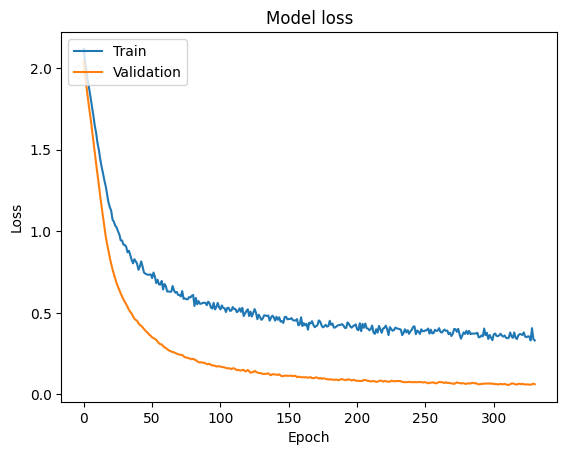

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

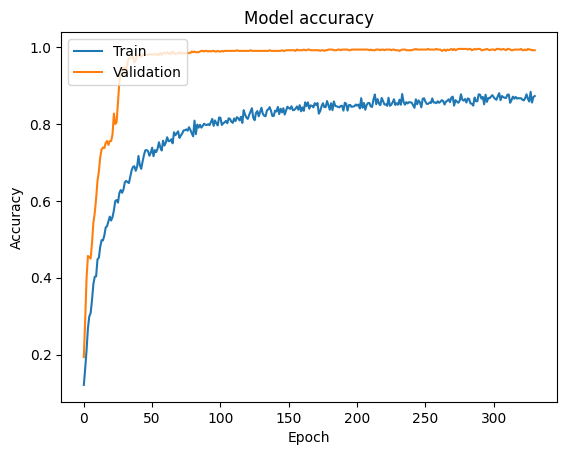

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()